# Overview
-we are using [titanic_dataset](https://www.kaggle.com/c/titanic/data?select=train.csv) for classification model to predict whether or not they survived the sinking of the Titanic.
- Data Dictionary
 1. survival: Survival(0 = No, 1 = Yes)
 2. pclass:	Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
 3. sex: male,female
 4. Age: Age in years	
 5. sibsp: of siblings / spouses aboard the Titanic	
 6. parch: of parents / children aboard the Titanic	
 7. ticket: Ticket number	
 8. fare:Passenger fare	
 9. cabin: Cabin number	
 10. embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)




**#Import all necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

**#Get the data** 

In [2]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

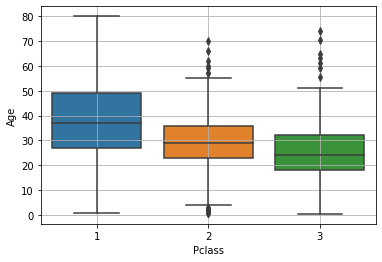

In [5]:
sns.boxplot(x='Pclass',y='Age',data=df)
plt.grid()

In [6]:
#according to mean of the class we fill the data
def imputeage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 25
    else:
        return Age  
    
#another way to fill the data
#age_mean =df['Age'].mean()
#df['Age'].fillna(age_mean, inplace=True)

In [7]:
df['Age']=df[['Age','Pclass']].apply(imputeage,axis=1)

In [8]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [9]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
df=df.dropna()

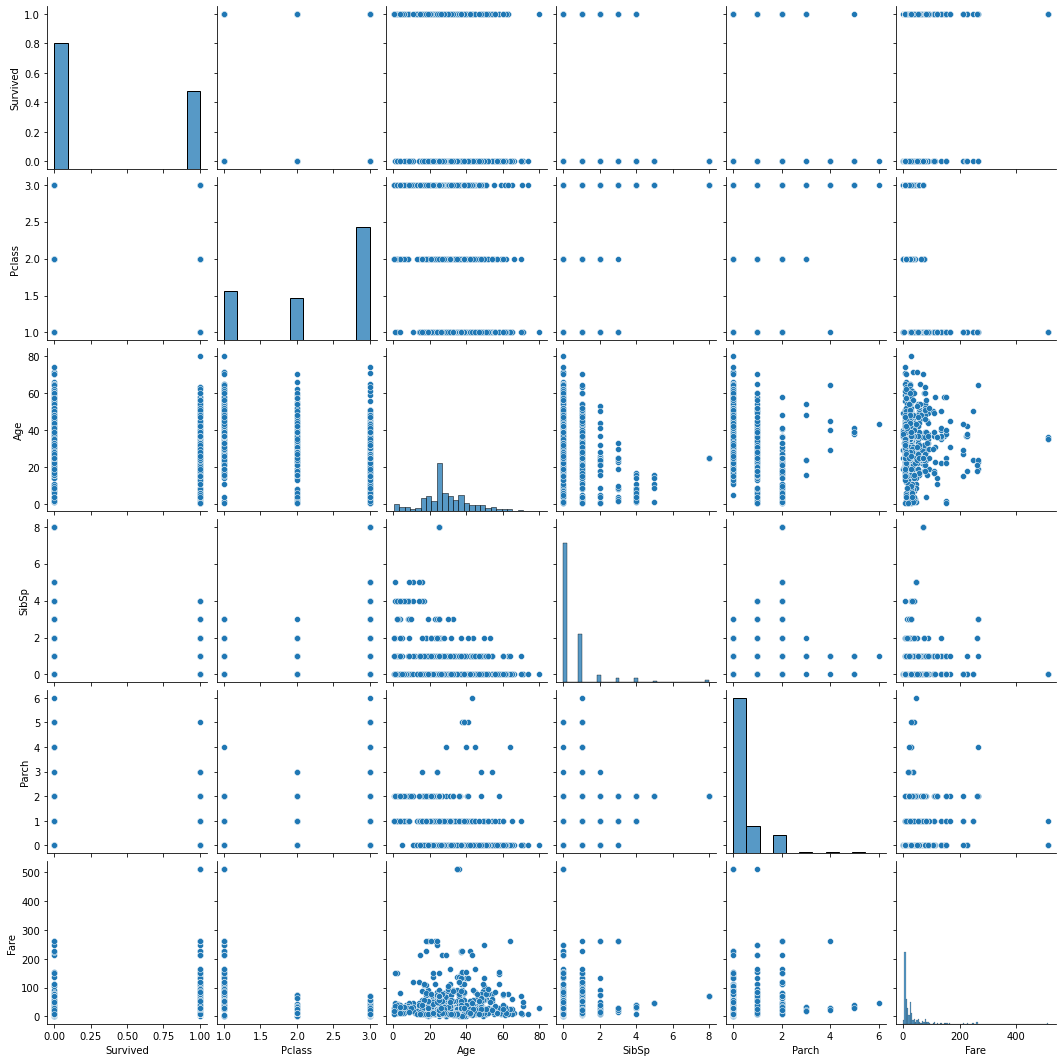

In [11]:
sns.pairplot(df)

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [16]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Sex','Embarked'])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [17]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
models = []

models.append(("Logreg    ", LogisticRegression()))
models.append(("KNN       ", KNeighborsClassifier()))
models.append(("SVC-l     ", SVC(kernel="linear")))
models.append(("SVC-r     ", SVC(kernel="rbf")))
models.append(("dt-g      ", DecisionTreeClassifier(criterion="gini")))
models.append(("dt-e      ", DecisionTreeClassifier(criterion="entropy")))
models.append(("rf-g      ", RandomForestClassifier(criterion="gini")))
models.append(("rf-e      ", RandomForestClassifier(criterion="entropy")))


for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(name)
    print(classification_report(ytest, ypred))
    print("---------------------------------")

Logreg    
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.77       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267

KNN       
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       166
           1       0.64      0.59      0.62       101

    accuracy                           0.72       267
   macro avg       0.70      0.69      0.70       267
weighted avg       0.72      0.72      0.72       267

SVC-l     
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       166
           1       0.77      0.74      0.76       101

    accuracy                           0.82       267
   macro avg       0.81      0.81      0.81       267
weighted avg       0.82      0.82      0.

**#Cross validation**

In [20]:
for name, model in models:
    cvs = cross_val_score(model, xtrain, ytrain, cv=15, scoring='accuracy')
    print(f"{name}  -: {cvs.mean()}    {cvs.std()}")

Logreg      -: 0.7845915602013164    0.0682061345895084
KNN         -: 0.6961672473867596    0.05624665080505614
SVC-l       -: 0.7718157181571816    0.07649165079001759
SVC-r       -: 0.6674022454510259    0.04952125753402955
dt-g        -: 0.7524970963995354    0.0686007835379618
dt-e        -: 0.7555942702284166    0.0646557755169854
rf-g        -: 0.7843205574912894    0.06420877222713685
rf-e        -: 0.7859465737514519    0.06915099514733875


#**Voting classifier**

In [21]:
from sklearn.ensemble import VotingClassifier

In [22]:
vc1 = VotingClassifier(estimators=models)
vc2 = VotingClassifier(estimators=models, voting="soft")

In [23]:
vc=[vc1,vc2]
for v in vc:
    vc1.fit(xtrain, ytrain)
    ypred = vc1.predict(xtest)
    print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       166
           1       0.88      0.69      0.77       101

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       166
           1       0.87      0.70      0.78       101

    accuracy                           0.85       267
   macro avg       0.85      0.82      0.83       267
weighted avg       0.85      0.85      0.84       267

